<a href="https://colab.research.google.com/github/insight2action/OSU-DataMining/blob/main/2_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CSE 5243:  Spring 2020

# Principal Component Analysis

updated by J. Van Hulse, January 2020

references:
* *Data Mining and Analysis*, Zaki and Miera Jr
* *Introduction to Data Mining* by Tan, Steinbach, Karpatne, and Kumar
***

This notebook provides a demonstration of *Principal Component Analysis (PCA)*, a commonly-used dimensionality reduction technique in Data Mining. 

The goal of PCA is to find a lower-dimensional projection of the data such that:

* Each pair of new attributes has a covariance of 0
* The attributes are ordered with respect to how much of the variance of the data each attribute captures
* The first attribute (the first principal component) captures as much of the variance in the data as possible
* Each successive attribute captures as much of the remaining variance as possible, subject to the orthogonality requirement. 

In many real-world applications, much of the variability in the data can be captured by a small fraction of the total number of dimensions, hence achieving the goal of dimensionality reduction. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#matplotlib and seaborn as used for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# PCA Using Simulated Data

Create a simulated dataset with two features: `var1` and `var2`. 

In [2]:
X, y = make_regression(n_samples=100, n_features=1, noise=24, random_state = 42, bias = 5)

#X is shape (100,1) - let's flatten it using the reshape method
var1 = 5+X.reshape((-1,))
var2 = 4+y/100
#var1 and var2 are both type ndarray with shape (100,)


Before performing Principal Component Analysis, it is important to transform the independent variables to be on the same scale. The `StandardScalar` package within `Scikit-learn` subtracts the mean and divides by the standard deviation, resulting in transformed variables with a mean of 0 and standard deviation of 1. 

In [3]:
x= pd.DataFrame({'var1':var1, 'var2':var2})
x = pd.DataFrame(StandardScaler().fit_transform(x))

pd.options.display.float_format = "{:.2f}".format

print("Means: ", x.mean())
print("Standard Deviations:", x.std())

Means:  0   -0.00
1   -0.00
dtype: float64
Standard Deviations: 0   1.01
1   1.01
dtype: float64


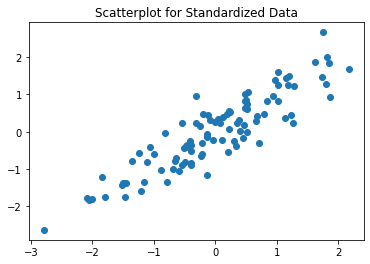

The correlation between var1 and var2 is:  0.8991547846502501


In [4]:
plt.scatter(x[0], x[1])
plt.title("Scatterplot for Standardized Data")
plt.show()

print("The correlation between var1 and var2 is: ", np.corrcoef(x[0], x[1])[0,1])

## Fitting the PCA Model

In [5]:
pca = PCA()

pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [6]:
first_pc = pca.components_[0,:]
print("The first principal component is: ", first_pc)
second_pc = pca.components_[1,:]
print("The second principal component is: ", second_pc)

The first principal component is:  [-0.70710678 -0.70710678]
The second principal component is:  [-0.70710678  0.70710678]


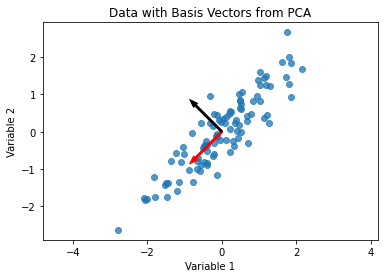

In [9]:
# Plot each principal component as an arrow, starting at mean
plt.scatter(x[0], x[1], alpha = 0.75)
plt.arrow(0, 0, first_pc[0], first_pc[1], color='red', width=0.05)
plt.arrow(0, 0, second_pc[0], second_pc[1], color='black', width=0.05)

# Keep axes on same scale
plt.axis('equal')
plt.title("Data with Basis Vectors from PCA")
plt.xlabel('Variable 1')
plt.ylabel("Variable 2")
plt.show()

In [11]:
out = pca.transform(x)
transformed_df = pd.DataFrame({'comp1': out[: ,0], 'comp2': out[:,1]})

transformed_df.head(6)

,comp1,comp2
0,-1.83,0.21
1,0.25,-0.54
2,1.04,0.46
3,-0.46,-0.19
4,0.47,0.11
5,-1.17,-0.00


In [12]:
print("The correlation between var1 and var2 is: ", np.corrcoef(transformed_df["comp1"], transformed_df['comp2'])[0,1])

The correlation between var1 and var2 is:  -4.810891664141183e-18


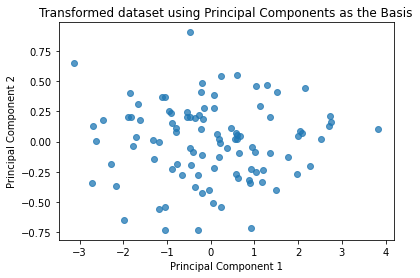

In [13]:
plt.scatter(transformed_df["comp1"], transformed_df["comp2"], alpha = 0.75)
plt.title("Transformed dataset using Principal Components as the Basis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [15]:
print("The percentage of variance explained by each principal component:")
print(100*pca.explained_variance_ratio_)

The percentage of variance explained by each principal component:
[94.95773923  5.04226077]


The first principal component explains almost 95% of the variation in the data. 

# PCA Using the IRIS Data

In [16]:
iris = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None, 
                   names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

iris.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.69,-0.04,1.27,0.52
sepal_width,-0.04,0.19,-0.32,-0.12
petal_length,1.27,-0.32,3.11,1.30
petal_width,0.52,-0.12,1.30,0.58


## Fitting a Model

In [17]:
from sklearn.preprocessing import StandardScaler
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# Separating out the features
x = iris.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

To run PCA, use the `decomposition` package within `scikit-learn`. First, set `n_components = 4`. 

In [18]:
pca = PCA(n_components=4)

principalComponents = pca.fit_transform(x)
pca.x = pd.DataFrame(data = principalComponents, columns = ['princomp1', 'princomp2','princomp3', 'princomp4'])


In [19]:
print("The amount of variance explained by each component:", pca.explained_variance_)
print(" ")
print("The percentage of variance explained by each component:", pca.explained_variance_ratio_)

The amount of variance explained by each component: [2.93035378 0.92740362 0.14834223 0.02074601]
 
The percentage of variance explained by each component: [0.72770452 0.23030523 0.03683832 0.00515193]


PCA will also compute what are called ``singular values``, which are closely related to the eigenvalues from PCA. In fact, a closely related concept to PCA is called **Singular Value Decomposition (SVD)** which we will cover later. For now, we'll just note that the eigenvalue $\lambda$ is related to the singular value $\sigma$ by 

$$
\lambda = \frac{\sigma^2 }{n-1}
$$

where $n$ is the number of records in the dataset. 

In [20]:
print(pca.singular_values_)

[20.89551896 11.75513248  4.7013819   1.75816839]


We can analyze the covariance matrix for the transformed dataset, confirming that the variances are indeed the eigenvalues. Further, the off-diagonal entries are zero. 

In [21]:
pca.x.cov()

,princomp1,princomp2,princomp3,princomp4
princomp1,2.93,0.00,-0.00,-0.00
princomp2,0.00,0.93,-0.00,-0.00
princomp3,-0.00,-0.00,0.15,0.00
princomp4,-0.00,-0.00,0.00,0.02


## Analyzing the variation

We can look at the percentage of variation captured by each principal component, but it is more useful to look at the cumulative percentage for the first $k$ principal components:

In [22]:
print("The percentage of variance explained by each principal component:")
print(100*pca.explained_variance_ratio_)

The percentage of variance explained by each principal component:
[72.77045209 23.03052327  3.68383196  0.51519268]


In [23]:
cumulative_variance = 100*pca.explained_variance_ratio_.cumsum()

print(cumulative_variance)

[ 72.77045209  95.80097536  99.48480732 100.        ]


The first two components capture a little bit more than 95% of the variation in the data. 

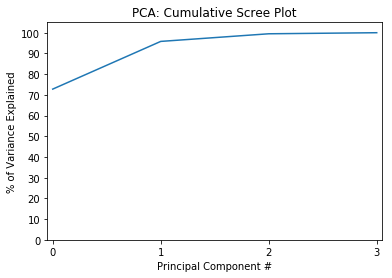

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cumulative_variance)
plt.title("PCA: Cumulative Scree Plot")
plt.ylabel("% of Variance Explained")
plt.xlabel("Principal Component #")
plt.axis([-0.05, 3.05, 0, 105]);
plt.xticks([0,1,2,3])
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90,100])
plt.grid(False)
plt.show()

## Dimensionality Reduction using PCA

PCA provides the transformed data as an output. In this case, the original columns are replaced with four new columns, labeled ``princompk``. Each new attribute is a linear combination of the original attributes. 

In [32]:
iris.pca = pd.concat([pca.x, iris[['class']]], axis = 1)
iris.pca.head()

,princomp1,princomp2,princomp3,princomp4,class
0,-2.26,0.51,-0.12,-0.02,Iris-setosa
1,-2.09,-0.66,-0.23,-0.10,Iris-setosa
2,-2.37,-0.32,0.05,-0.03,Iris-setosa
3,-2.30,-0.58,0.10,0.07,Iris-setosa
4,-2.39,0.67,0.02,0.04,Iris-setosa


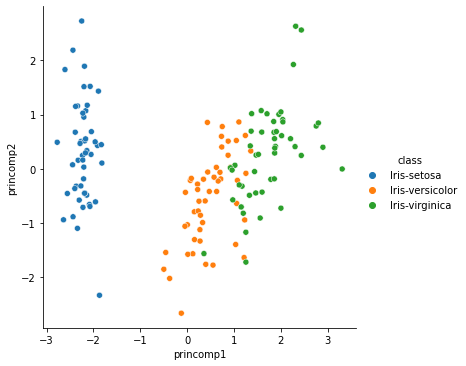

In [33]:
sns.relplot(x="princomp1", y="princomp2", hue = 'class', data=iris.pca);

In [34]:
U = pca.components_.transpose()
print(U)

[[ 0.52237162  0.37231836 -0.72101681 -0.26199559]
 [-0.26335492  0.92555649  0.24203288  0.12413481]
 [ 0.58125401  0.02109478  0.14089226  0.80115427]
 [ 0.56561105  0.06541577  0.6338014  -0.52354627]]


The eigenvectors are the columns of the matrix $U$ above. For example,

$$
U_1 = 
\begin{bmatrix}
    0.5223\\
    -0.2633\\
    0.5812\\
    0.5656
  \end{bmatrix}
$$

Further, as you can see below, $U$ is an *orthogonal* matrix. In other words, the norm of each eigenvector is 1, while the eigenvectors are orthogonal to each other. 

In [35]:
print(np.matmul(U, U.transpose()))

[[ 1.00000000e+00  1.50649306e-18 -3.17915979e-16 -5.27696197e-16]
 [ 1.50649306e-18  1.00000000e+00 -7.31014497e-17  5.64144388e-17]
 [-3.17915979e-16 -7.31014497e-17  1.00000000e+00 -2.14734934e-16]
 [-5.27696197e-16  5.64144388e-17 -2.14734934e-16  1.00000000e+00]]


Suppose that we would like to keep only the first two dimensions: in other words, we would like to project the data points onto a two-dimensional subspace. This corresponds with the matrix:

$$
U_2 = 
\begin{bmatrix}
    0.5223 & 0.3723\\
    -0.2633 & 0.9255\\
    0.5812 & 0.0210\\
    0.5656 & 0.0654
  \end{bmatrix}
$$

The new data is represented by 

$$
A = U_2^T X
$$

For example, 
$$
x_1 = 
\begin{bmatrix}
    -0.900681\\	
    1.032057\\	
    -1.341272\\	
    -1.312977
\end{bmatrix}
\rightarrow 
a_1=
\begin{bmatrix}
-2.264542\\	
0.505704
\end{bmatrix}
$$ 

You can also think of the components of PCA as the effect of each of the original attributes on that particular dimension. 

For example, relative to the PC1, *petal length* has the highest positive impact, while sepal_width is the only attribute with a negative impact. 

For PC2, the effects of *petal length* and *petal width* are minimal; this component focuses more on the *sepal*-related attributes. In particular, *sepal width* is the dominant factor. 

In [56]:
print('PC 1 effects = ' + str(dict(zip(iris.columns, pca.components_[0]))))
print('PC 2 effects = ' + str(dict(zip(iris.columns, pca.components_[1]))))

PC 1 effects = {'sepal_length': 0.5223716204076599, 'sepal_width': -0.26335491531393995, 'petal_length': 0.5812540055976476, 'petal_width': 0.5656110498826488}
PC 2 effects = {'sepal_length': 0.3723183633499692, 'sepal_width': 0.9255564941472946, 'petal_length': 0.0210947768412465, 'petal_width': 0.06541576907892788}


You can create a scatterplot of each of the original features versus the principal components to see what the relation is:

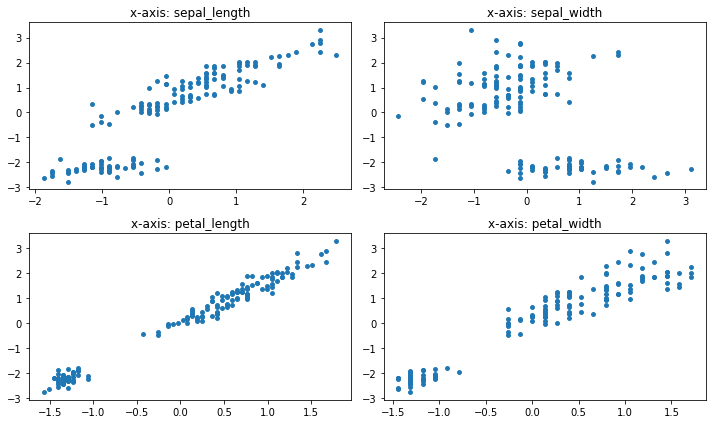

In [54]:
fig, axs = plt.subplots(2,2, figsize = (10,6))

axs[0,0].scatter(x = x[:, 0], y = pca.x['princomp1'], s = 15)
axs[0,0].set_title('x-axis: sepal_length')
axs[0,1].scatter(x = x[:, 1], y = pca.x['princomp1'], s = 15)
axs[0,1].set_title('x-axis: sepal_width')
axs[1,0].scatter(x = x[:, 2], y = pca.x['princomp1'], s = 15)
axs[1,0].set_title('x-axis: petal_length')
axs[1,1].scatter(x = x[:, 3], y = pca.x['princomp1'], s = 15)
axs[1,1].set_title('x-axis: petal_width')
fig.tight_layout()

plt.show()

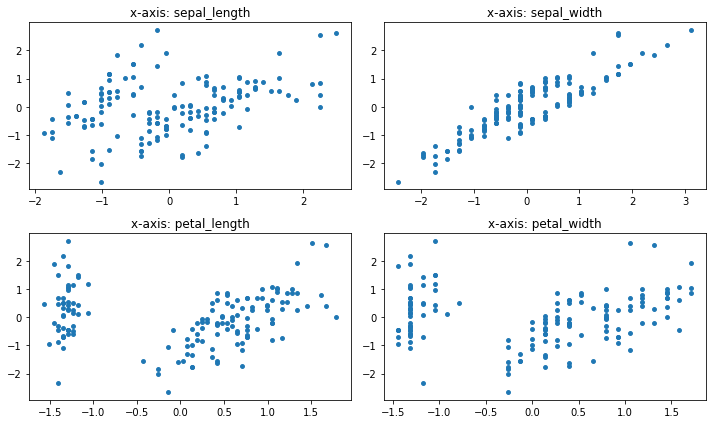

In [55]:
fig, axs = plt.subplots(2,2, figsize = (10,6))
axs[0,0].scatter(x = x[:, 0], y = pca.x['princomp2'], s=15)
axs[0,0].set_title('x-axis: sepal_length')
axs[0,1].scatter(x = x[:, 1], y = pca.x['princomp2'], s=15)
axs[0,1].set_title('x-axis: sepal_width')
axs[1,0].scatter(x = x[:, 2], y = pca.x['princomp2'], s=15)
axs[1,0].set_title('x-axis: petal_length')
axs[1,1].scatter(x = x[:, 3], y = pca.x['princomp2'], s=15)
axs[1,1].set_title('x-axis: petal_width')
fig.tight_layout()

    
plt.show()

## Reconstructing the original data

You can use the `inverse_transform` method on the reduced dataset to recover an estimate for the original dataset. 

In [57]:
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2)

x_proj = pca_2d.fit_transform(x)

x_inv = pca_2d.inverse_transform(x_proj)

In [58]:
print("Original record (after scaling): ", x[0])
print("2-d PCA representation: ", x_proj[0])
print("Recovered record (inverse transformation): ", x_inv[0])

Original record (after scaling):  [-0.90068117  1.03205722 -1.3412724  -1.31297673]
2-d PCA representation:  [-2.26454173  0.5057039 ]
Recovered record (inverse transformation):  [-0.99464948  1.06443573 -1.30560624 -1.24776881]


# Limitations

PCA is a very useful tool for the data scientist.  Projecting high dimensional data to 2 or 3 dimensions helps us better visualize the relationships inherent in the data. Through dimensionality reduction, we can squeeze lots of incremental information into a relatively small number of attributes. 

There are, however, a number of important limitations: 
* Since PCA is built off of the covariance matrix, PCA only works where a covariance can be computed, i.e., with continuous data. 
* PCA does not natively handle missing values, and it can be impacted by outliers and noise (though standardization can help). 
* PCA will only capture linear relationships; if the data fits to a more complex nonlinear subspace, PCA may not pick up the relationships. 
* Finally, because each principal component is a linear combination of the input attributes, you will still need to collect all of the data from all of those attributes to compute the coordinates for each record. Hence you are not truly saving time and effort on the data collection process. 

Despite these challenges PCA remains an interesting and useful technique. 
